In [4]:
import numpy as np
a  = np.zeros((3, 2, 2))
a

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [8]:
a[0] = [[1,2], [3, 4]]
a
a[1] = [[5,6], [7, 8]]
a
a[2] = [[9,10], [11, 12]]
a

array([[[ 1.,  2.],
        [ 3.,  4.]],

       [[ 5.,  6.],
        [ 7.,  8.]],

       [[ 9., 10.],
        [11., 12.]]])

In [9]:
b = np.reshape(a, (4,3))
b

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [11]:
c = np.reshape(a, (3, 4))
c

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [15]:
d = c.transpose()
d

array([[ 1.,  5.,  9.],
       [ 2.,  6., 10.],
       [ 3.,  7., 11.],
       [ 4.,  8., 12.]])

In [106]:

def apply_pca(image, n_components):
    from sklearn.decomposition import TruncatedSVD as SVD
    import numpy as np
    a = np.reshape(image, (image.shape[0], image.shape[1] * image.shape[2]))
    todo = a.transpose()
    pca = PCA(n_components=n_components)
    transformed_image = pca.fit_transform(todo)
    return pca, transformed_image
def write_components(transformed_image):
    import numpy as np
    r = transformed_image.transpose()
    print(transformed_image.shape[1])
    components = np.reshape(r, (r.shape[0], int(np.sqrt(r.shape[1])),int(np.sqrt(r.shape[1]))  ) )
    return components
    
def reconstruct_image(pca, transformed_image, original_shape):
    from sklearn.decomposition import TruncatedSVD as SVD
    import numpy as np
    reverse = pca.inverse_transform(transformed_image)
    r = reverse.transpose()
    reconstructed_image = r.reshape(original_shape, int(np.sqrt(r.shape[1])) ,int(np.sqrt(r.shape[1])) )
    return reconstructed_image


In [53]:

import mrcfile 
with mrcfile.open("mrcs/small_ribosome.mrc") as mrc:
    a= mrc.data

mrc.close

<bound method MrcFile.close of MrcFile('mrcs/small_ribosome.mrc', mode='r')>

(16384, 5)
5


(5, 128, 128)

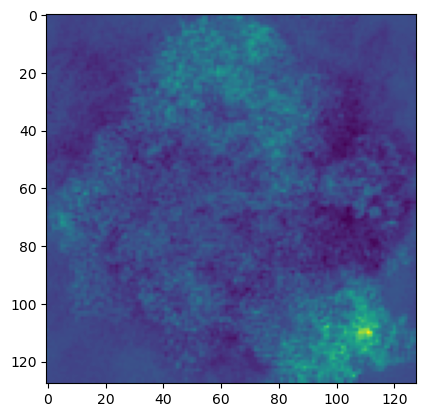

In [119]:
pca, components = apply_pca(a, 5)
print(components.shape)
comp = write_components(components)
import matplotlib.pyplot as plt
plt.imshow(comp[1])
comp.shape

(17, 128, 128)

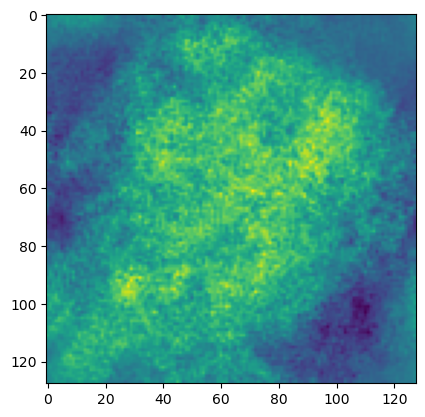

In [122]:
rec = reconstruct_image(pca, components, a.shape[0])
plt.imshow(rec[10])
rec.shape

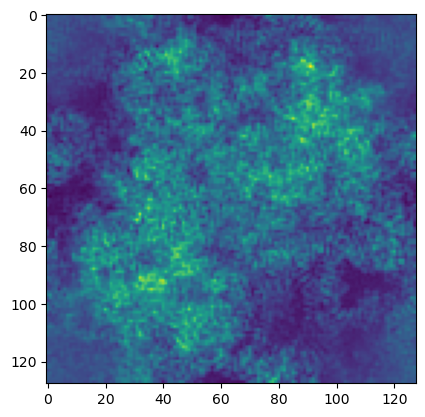

In [123]:
plt.imshow(a[10])

In [105]:
rec[0]

array([[-0.00087381, -0.00088438, -0.00088238, ..., -0.00084499,
        -0.00089472, -0.00088208],
       [-0.00089904, -0.00089086, -0.00088298, ..., -0.00091314,
        -0.00089405, -0.00086727],
       [-0.00088093, -0.00086669, -0.00088934, ..., -0.00086115,
        -0.00086784, -0.00090296],
       ...,
       [-0.00087143, -0.00088691, -0.00089438, ..., -0.00089097,
        -0.00089373, -0.00091049],
       [-0.00088213, -0.00089332, -0.00086546, ..., -0.00087056,
        -0.00088475, -0.00086265],
       [-0.00089511, -0.00087224, -0.00089873, ..., -0.0009088 ,
        -0.00087547, -0.00089453]], dtype=float32)

In [104]:
a[0]

array([[-0.00087381, -0.00088438, -0.00088238, ..., -0.00084499,
        -0.00089472, -0.00088208],
       [-0.00089904, -0.00089086, -0.00088298, ..., -0.00091314,
        -0.00089405, -0.00086727],
       [-0.00088093, -0.00086669, -0.00088934, ..., -0.00086115,
        -0.00086784, -0.00090296],
       ...,
       [-0.00087143, -0.00088691, -0.00089438, ..., -0.00089097,
        -0.00089373, -0.00091049],
       [-0.00088213, -0.00089332, -0.00086546, ..., -0.00087056,
        -0.00088475, -0.00086265],
       [-0.00089511, -0.00087224, -0.00089873, ..., -0.0009088 ,
        -0.00087547, -0.00089453]], dtype=float32)